In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## First Order System Simulation

In [2]:
# Simulate taup * dy/dt = -y + K*u
Kp = 3.0
taup = 2.0

#### Transfer function

In [3]:
num = [Kp]
den = [taup,1]
sys1 = signal.TransferFunction(num,den)
t1,y1 = signal.step(sys1)

#### State Space

In [4]:
A = -1.0/taup
B = Kp/taup
C = 1.0
D = 0.0
sys2 = signal.StateSpace(A,B,C,D)
t2,y2 = signal.step(sys2)

#### ODE Integrator

In [5]:
def model3(y,t):
    u = 1
    return (-y + Kp * u)/taup
t3 = np.linspace(0,14,100)
y3 = odeint(model3,0,t3)

#### Plot

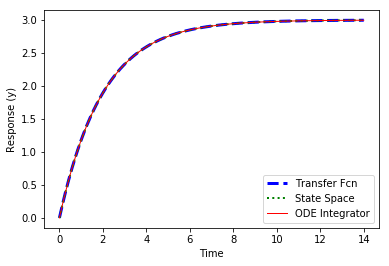

In [6]:
plt.plot(t1,y1,'b--',linewidth=3,label='Transfer Fcn')
plt.plot(t2,y2,'g:',linewidth=2,label='State Space')
plt.plot(t3,y3,'r-',linewidth=1,label='ODE Integrator')
plt.xlabel('Time')
plt.ylabel('Response (y)')
plt.legend(loc='best')
plt.show()

## Second Order System Simulation

In [7]:
# tau * dy2/dt2 + 2*zeta*tau*dy/dt + y = Kp*u
Kp = 2.0    # gain
tau = 1.0   # time constant
zeta = 0.25 # damping factor
theta = 0.0 # no time delay
du = 1.0    # change in u

#### Transfer function

In [8]:
num = [Kp]
den = [tau**2,2*zeta*tau,1]
sys1 = signal.TransferFunction(num,den)
t1,y1 = signal.step(sys1)

#### State Space

In [9]:
A = [[0.0,1.0],[-1.0/tau**2,-2.0*zeta/tau]]
B = [[0.0],[Kp/tau**2]]
C = [1.0,0.0]
D = 0.0
sys2 = signal.StateSpace(A,B,C,D)
t2,y2 = signal.step(sys2)

#### ODE Integrator

In [10]:
def model3(x,t):
    y = x[0]
    dydt = x[1]
    dy2dt2 = (-2.0*zeta*tau*dydt - y + Kp*du)/tau**2
    return [dydt,dy2dt2]
t3 = np.linspace(0,25,100)
x3 = odeint(model3,[0,0],t3)
y3 = x3[:,0]

#### Plot

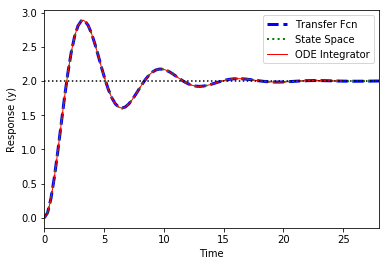

In [11]:
plt.plot(t1,y1*du,'b--',linewidth=3,label='Transfer Fcn')
plt.plot(t2,y2*du,'g:',linewidth=2,label='State Space')
plt.plot(t3,y3,'r-',linewidth=1,label='ODE Integrator')
y_ss = Kp * du
plt.plot([0,max(t1)],[y_ss,y_ss],'k:')
plt.xlim([0,max(t1)])
plt.xlabel('Time')
plt.ylabel('Response (y)')
plt.legend(loc='best')
plt.savefig('2nd_order.png')
plt.show()